# Rapidata Take-Home Assignment

### Alex John Caldarone

17/04/2025

In [104]:
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gower
from sklearn_extra.cluster import KMedoids

from utils import (
    get_model_name_from_df
)

plt.style.use("seaborn-v0_8-whitegrid")  # Clean and modern look
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'font.family': 'serif',  # or 'sans-serif' if you prefer
    'axes.edgecolor': '#333F4B',
    'axes.linewidth': 1.2,
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'figure.dpi': 150
})

In [105]:
with open("results.json") as f:
    results = json.load(f)

In [106]:
results

{'info': {'createdAt': '2025-04-10T14:13:13.206849+00:00',
  'version': '4.0.0',
  'orderType': 'Compare',
  'name': 'Image Prompt Alignment Test',
  'instruction': 'Which image follows the prompt more accurately?'},
 'summary': {'A_wins_total': 75, 'B_wins_total': 45},
 'results': [{'context': 'A blue bunny in a pink water toilet bowl.',
   'winner_index': 1,
   'winner': 'dalle3_bunny.jpg',
   'aggregatedResults': {'4o_bunny.jpg': 2, 'dalle3_bunny.jpg': 3},
   'aggregatedResultsRatios': {'4o_bunny.jpg': 0.4, 'dalle3_bunny.jpg': 0.6},
   'summedUserScores': {'4o_bunny.jpg': 0.7101, 'dalle3_bunny.jpg': 1.786},
   'summedUserScoresRatios': {'4o_bunny.jpg': 0.2845,
    'dalle3_bunny.jpg': 0.7155},
   'detailedResults': [{'votedFor': 'dalle3_bunny.jpg',
     'userDetails': {'country': 'ES',
      'language': 'es',
      'userScore': 0.6753,
      'age': '18-29',
      'gender': 'Female',
      'occupation': 'Unknown'}},
    {'votedFor': 'dalle3_bunny.jpg',
     'userDetails': {'country': 

Dataframe creation and data manipulation

In [107]:
df = pd.DataFrame(results["results"])

In [108]:
df

,context,winner_index,winner,aggregatedResults,aggregatedResultsRatios,summedUserScores,summedUserScoresRatios,detailedResults
0,A blue bunny in a pink water toilet bowl.,1,dalle3_bunny.jpg,"{'4o_bunny.jpg': 2, 'dalle3_bunny.jpg': 3}","{'4o_bunny.jpg': 0.4, 'dalle3_bunny.jpg': 0.6}","{'4o_bunny.jpg': 0.7101, 'dalle3_bunny.jpg': 1...","{'4o_bunny.jpg': 0.2845, 'dalle3_bunny.jpg': 0...","[{'votedFor': 'dalle3_bunny.jpg', 'userDetails..."
1,A blue bunny in a pink water toilet bowl.,1,halfmoon_bunny.jpg,"{'4o_bunny.jpg': 1, 'halfmoon_bunny.jpg': 6}","{'4o_bunny.jpg': 0.1429, 'halfmoon_bunny.jpg':...","{'4o_bunny.jpg': 0.6962, 'halfmoon_bunny.jpg':...","{'4o_bunny.jpg': 0.2124, 'halfmoon_bunny.jpg':...","[{'votedFor': 'halfmoon_bunny.jpg', 'userDetai..."
2,A blue bunny in a pink water toilet bowl.,1,stablediffusion_bunny.jpg,"{'4o_bunny.jpg': 2, 'stablediffusion_bunny.jpg...","{'4o_bunny.jpg': 0.3333, 'stablediffusion_bunn...","{'4o_bunny.jpg': 0.4898, 'stablediffusion_bunn...","{'4o_bunny.jpg': 0.3186, 'stablediffusion_bunn...","[{'votedFor': 'stablediffusion_bunny.jpg', 'us..."
3,A blue bunny in a pink water toilet bowl.,0,dalle3_bunny.jpg,"{'dalle3_bunny.jpg': 4, 'halfmoon_bunny.jpg': 1}","{'dalle3_bunny.jpg': 0.8, 'halfmoon_bunny.jpg'...","{'dalle3_bunny.jpg': 1.341, 'halfmoon_bunny.jp...","{'dalle3_bunny.jpg': 0.6571, 'halfmoon_bunny.j...","[{'votedFor': 'halfmoon_bunny.jpg', 'userDetai..."
4,A blue bunny in a pink water toilet bowl.,1,stablediffusion_bunny.jpg,"{'dalle3_bunny.jpg': 2, 'stablediffusion_bunny...","{'dalle3_bunny.jpg': 0.4, 'stablediffusion_bun...","{'dalle3_bunny.jpg': 0.4005, 'stablediffusion_...","{'dalle3_bunny.jpg': 0.2233, 'stablediffusion_...","[{'votedFor': 'dalle3_bunny.jpg', 'userDetails..."
...,...,...,...,...,...,...,...,...
115,A black colored banana.,1,halfmoon_banana.jpg,"{'4o_banana.jpg': 1, 'halfmoon_banana.jpg': 5}","{'4o_banana.jpg': 0.1667, 'halfmoon_banana.jpg...","{'4o_banana.jpg': 0.3932, 'halfmoon_banana.jpg...","{'4o_banana.jpg': 0.16, 'halfmoon_banana.jpg':...","[{'votedFor': '4o_banana.jpg', 'userDetails': ..."
116,A black colored banana.,0,4o_banana.jpg,"{'4o_banana.jpg': 3, 'stablediffusion_banana.j...","{'4o_banana.jpg': 0.6, 'stablediffusion_banana...","{'4o_banana.jpg': 1.297, 'stablediffusion_bana...","{'4o_banana.jpg': 0.7398, 'stablediffusion_ban...","[{'votedFor': '4o_banana.jpg', 'userDetails': ..."
117,A black colored banana.,0,dalle3_banana.jpg,"{'dalle3_banana.jpg': 5, 'halfmoon_banana.jpg'...","{'dalle3_banana.jpg': 0.8333, 'halfmoon_banana...","{'dalle3_banana.jpg': 1.2381, 'halfmoon_banana...","{'dalle3_banana.jpg': 0.7539, 'halfmoon_banana...","[{'votedFor': 'dalle3_banana.jpg', 'userDetail..."
118,A black colored banana.,0,dalle3_banana.jpg,"{'dalle3_banana.jpg': 3, 'stablediffusion_bana...","{'dalle3_banana.jpg': 0.6, 'stablediffusion_ba...","{'dalle3_banana.jpg': 1.4185, 'stablediffusion...","{'dalle3_banana.jpg': 0.6981, 'stablediffusion...","[{'votedFor': 'stablediffusion_banana.jpg', 'u..."


In [109]:
df_exploded = df.explode("detailedResults").reset_index(drop=True)

In [110]:
user_details_df = pd.json_normalize(df_exploded["detailedResults"]).reset_index(drop=True)

In [111]:
df_exploded = pd.concat([df_exploded, user_details_df], axis=1)

In [112]:
df_exploded[["model1", "model2"]] = df_exploded.apply(lambda x: get_model_name_from_df(x), axis=1).apply(pd.Series)

In [113]:
df_exploded = df_exploded.drop(columns=["detailedResults", "aggregatedResults", "aggregatedResultsRatios", "summedUserScores", "summedUserScoresRatios"])

In [114]:
df_exploded

,context,winner_index,winner,votedFor,userDetails.country,userDetails.language,userDetails.userScore,userDetails.age,userDetails.gender,userDetails.occupation,model1,model2
0,A blue bunny in a pink water toilet bowl.,1,dalle3_bunny.jpg,dalle3_bunny.jpg,ES,es,0.6753,18-29,Female,Unknown,4o,dalle3
1,A blue bunny in a pink water toilet bowl.,1,dalle3_bunny.jpg,dalle3_bunny.jpg,EG,ar,0.4068,40-49,Other,Education,4o,dalle3
2,A blue bunny in a pink water toilet bowl.,1,dalle3_bunny.jpg,dalle3_bunny.jpg,RS,sr,0.7039,50-64,Male,Education,4o,dalle3
3,A blue bunny in a pink water toilet bowl.,1,dalle3_bunny.jpg,4o_bunny.jpg,BO,es,0.3385,0-17,Other,Other Employment,4o,dalle3
4,A blue bunny in a pink water toilet bowl.,1,dalle3_bunny.jpg,4o_bunny.jpg,RS,sr,0.3717,40-49,Female,Unemployed or Student,4o,dalle3
...,...,...,...,...,...,...,...,...,...,...,...,...
641,A black colored banana.,0,halfmoon_banana.jpg,halfmoon_banana.jpg,ES,es,0.6997,18-29,Female,Unknown,halfmoon,stablediffusion
642,A black colored banana.,0,halfmoon_banana.jpg,halfmoon_banana.jpg,RU,ru,0.6593,65+,Other,Unknown,halfmoon,stablediffusion
643,A black colored banana.,0,halfmoon_banana.jpg,halfmoon_banana.jpg,DZ,en,0.6654,Unknown,Unknown,Unknown,halfmoon,stablediffusion
644,A black colored banana.,0,halfmoon_banana.jpg,stablediffusion_banana.jpg,IN,en,0.3982,Unknown,Unknown,Unknown,halfmoon,stablediffusion


In [115]:
df_exploded["winner_model"] = df_exploded.apply(lambda x: x["winner"].split("_")[0], axis=1)

In [116]:
df_exploded["voted_for_model"] = df_exploded.apply(lambda x: x["votedFor"].split("_")[0], axis=1)

In [117]:
# converting variables to the appropriate types

#df_exploded["model1"] = df_exploded["model1"].astype("category")
#df_exploded["model2"] = df_exploded["model2"].astype("category")
#df_exploded["winner_model"] = df_exploded["winner_model"].astype("category")
#df_exploded["voted_for_model"] = df_exploded["voted_for_model"].astype("category")
#df_exploded["userDetails.country"] = df_exploded["userDetails.country"].astype("category")
#df_exploded["userDetails.language"] = df_exploded["userDetails.language"].astype("category")
#df_exploded["userDetails.gender"] = df_exploded["userDetails.gender"].astype("category")
#df_exploded["userDetails.occupation"] = df_exploded["userDetails.occupation"].astype("category")

### Exploratory data analysis

In [118]:
# overall, which one was the preferred model?

overall_counts = (
    df_exploded
    .groupby(['winner_model'])  # both grouping keys here
    .size()
    .reset_index(name='count')
)

overall_counts['percentage'] = (
    overall_counts['count'] / overall_counts['count'].sum()
)

overall_counts

,winner_model,count,percentage
0,4o,193,0.298762
1,dalle3,169,0.261610
2,halfmoon,178,0.275542
3,stablediffusion,106,0.164087


In [119]:
# analyzing which model wins the most for every prompt
#counts = df_exploded.groupby("context")["winner"].value_counts().reset_index("winner")
counts = (
    df_exploded
    .groupby(['context', 'winner_model'])  # both grouping keys here
    .size()
    .reset_index(name='count')
)

counts['percentage'] = (
    counts['count'] / counts.groupby(['context'])['count'].transform('sum')
)

In [120]:
counts

,context,winner_model,count,percentage
0,A baseball player in a blue and white uniform ...,4o,52,0.422764
1,A baseball player in a blue and white uniform ...,dalle3,35,0.284553
2,A baseball player in a blue and white uniform ...,halfmoon,26,0.211382
3,A baseball player in a blue and white uniform ...,stablediffusion,10,0.081301
4,A bathroom with green tile and a red shower cu...,4o,51,0.383459
5,A bathroom with green tile and a red shower cu...,dalle3,27,0.203008
6,A bathroom with green tile and a red shower cu...,halfmoon,28,0.210526
7,A bathroom with green tile and a red shower cu...,stablediffusion,27,0.203008
8,A black colored banana.,4o,36,0.283465
9,A black colored banana.,dalle3,42,0.330709


In [121]:
pivoted = counts.pivot(index="context", columns="winner_model", values="percentage")
pivoted = pivoted.fillna(0)

In [122]:
pivoted
pivoted["context_summary"] = ["Baseball", "Bathroom", "Banana", "Bunny", "Family"]

In [123]:
pivoted

winner_model,4o,dalle3,halfmoon,stablediffusion,context_summary
context,,,,,
A baseball player in a blue and white uniform is next to a player in black and white.,0.422764,0.284553,0.211382,0.081301,Baseball
A bathroom with green tile and a red shower curtain.,0.383459,0.203008,0.210526,0.203008,Bathroom
A black colored banana.,0.283465,0.330709,0.385827,0.000000,Banana
A blue bunny in a pink water toilet bowl.,0.123077,0.292308,0.215385,0.369231,Bunny
A family is having a barbecue in the park.,0.285714,0.203008,0.353383,0.157895,Family


<Axes: title={'center': 'Model Preference by Context'}, xlabel='Context', ylabel='Percentage'>

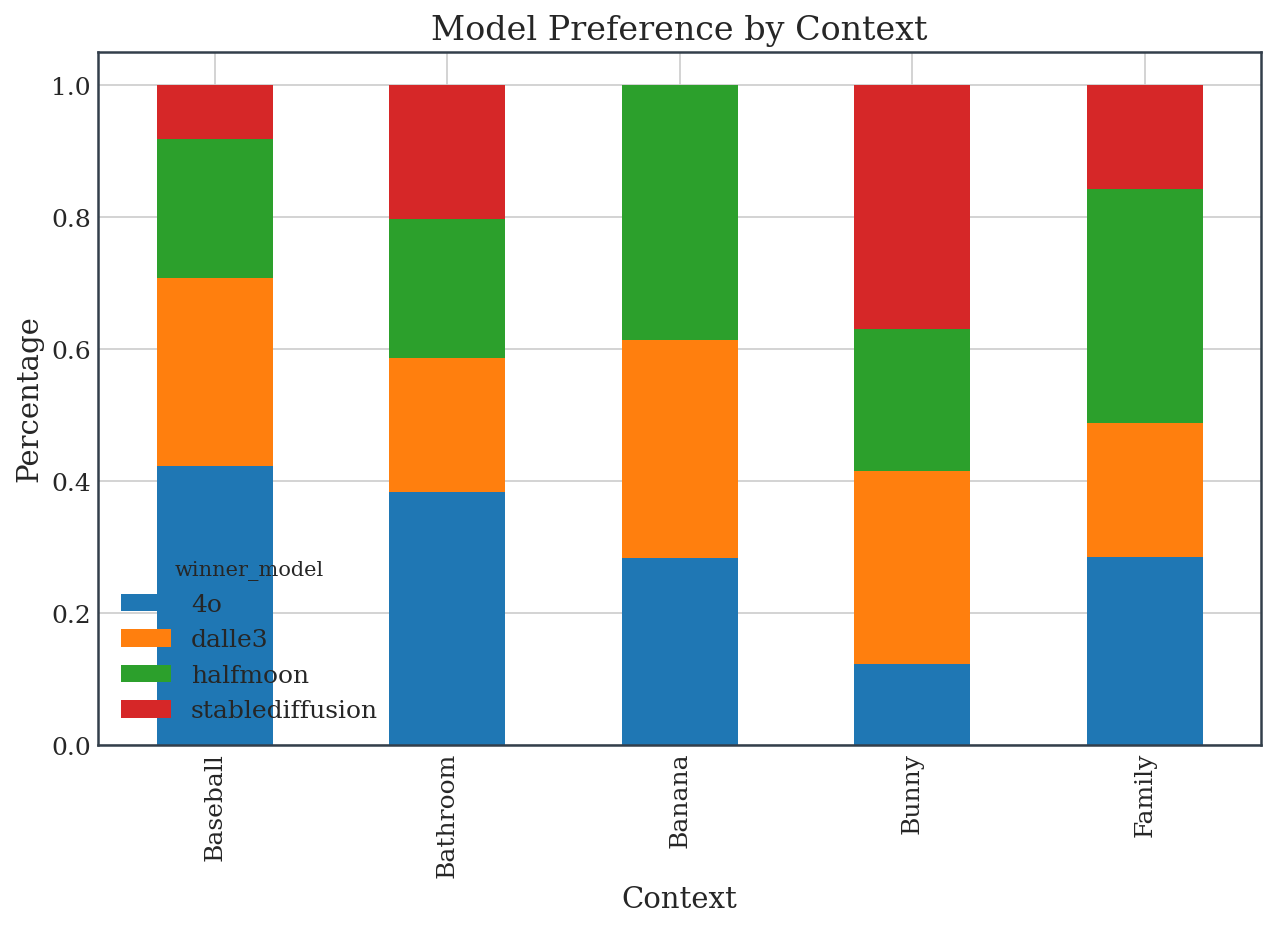

In [124]:
pivoted.plot(
    x = "context_summary",
    kind = "bar",
    stacked = True,
    title = "Model Preference by Context",
    xlabel = "Context",
    ylabel = "Percentage",
    figsize = (10, 6),
    legend = True,
    fontsize = 12
)

Interestingly, for the banana image, the stable diffusion model was never selected as the preferred one.

In [125]:
# preferred model by age group

age_group_counts = (
    df_exploded
    .groupby(['userDetails.age', 'winner_model'])  # both grouping keys here
    .size()
    .reset_index(name='count')
)

age_group_counts['percentage'] = (
    age_group_counts['count'] / age_group_counts.groupby(['userDetails.age'])['count'].transform('sum')
)

In [126]:
age_group_counts

,userDetails.age,winner_model,count,percentage
0,0-17,4o,21,0.283784
1,0-17,dalle3,18,0.243243
2,0-17,halfmoon,21,0.283784
3,0-17,stablediffusion,14,0.189189
4,18-29,4o,25,0.240385
5,18-29,dalle3,30,0.288462
6,18-29,halfmoon,30,0.288462
7,18-29,stablediffusion,19,0.182692
8,30-39,4o,26,0.337662
9,30-39,dalle3,21,0.272727


<Axes: xlabel='userDetails.age'>

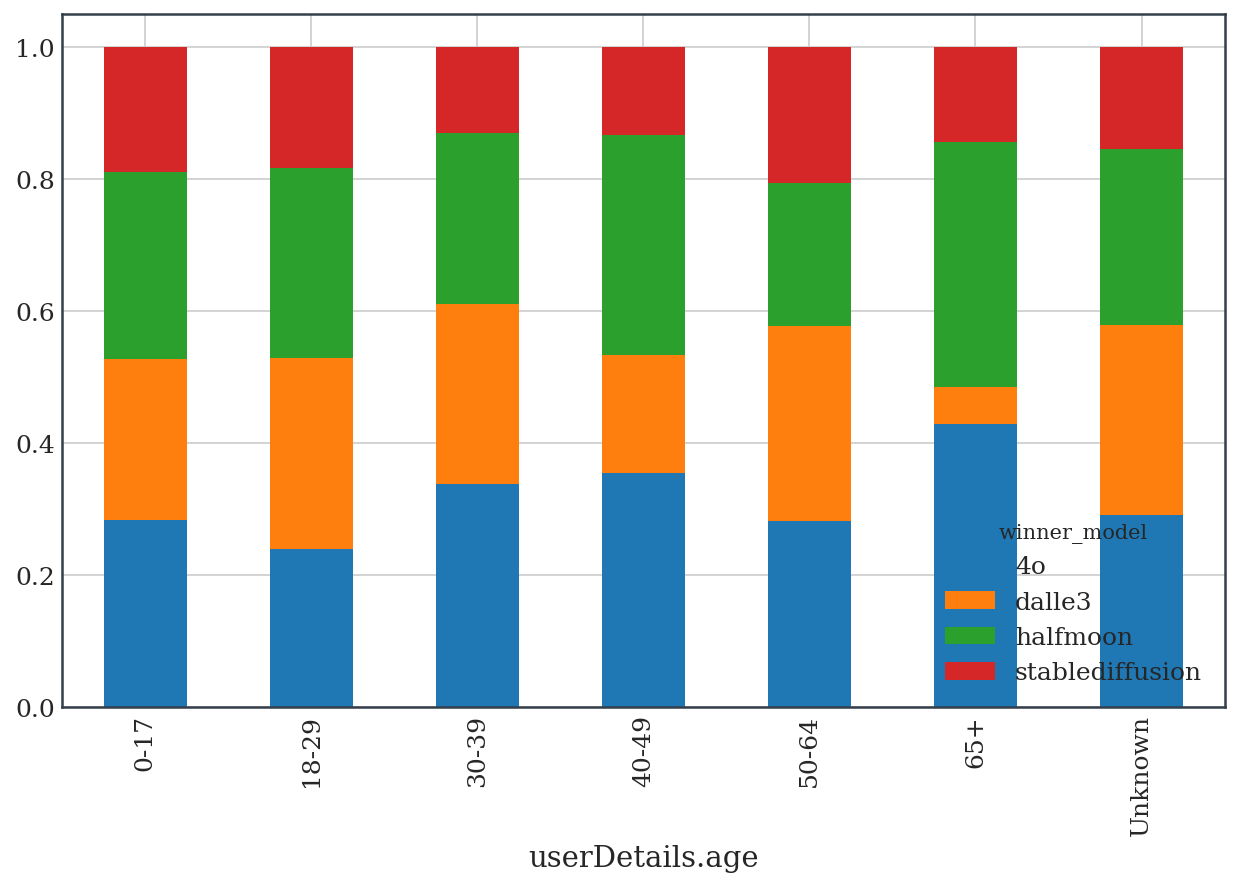

In [127]:
# plot the preferred model by age group
age_group_counts_pivoted = age_group_counts.pivot(index="userDetails.age", columns="winner_model", values="percentage")

# plot
age_group_counts_pivoted.plot(kind='bar', stacked=True, figsize=(10, 6))

In [128]:
# age group distribution by context

age_group_counts_by_context = (
    df_exploded
    .groupby(['context', 'userDetails.age'])  # both grouping keys here
    .size()
    .reset_index(name='count')
)

age_group_counts_by_context['percentage'] = (
    age_group_counts_by_context['count'] / age_group_counts_by_context.groupby(['context'])['count'].transform('sum')
)

In [129]:
age_group_counts_by_context

,context,userDetails.age,count,percentage
0,A baseball player in a blue and white uniform ...,0-17,13,0.105691
1,A baseball player in a blue and white uniform ...,18-29,19,0.154472
2,A baseball player in a blue and white uniform ...,30-39,12,0.097561
3,A baseball player in a blue and white uniform ...,40-49,6,0.048780
4,A baseball player in a blue and white uniform ...,50-64,19,0.154472
5,A baseball player in a blue and white uniform ...,65+,6,0.048780
6,A baseball player in a blue and white uniform ...,Unknown,48,0.390244
7,A bathroom with green tile and a red shower cu...,0-17,14,0.105263
8,A bathroom with green tile and a red shower cu...,18-29,17,0.127820
9,A bathroom with green tile and a red shower cu...,30-39,23,0.172932


In [130]:
# model preference by context and gender

preferences_by_gender = (
    df_exploded
    .groupby(['winner_model', 'userDetails.gender'])  # both grouping keys here
    .size()
    .reset_index(name='count')
)

preferences_by_gender['percentage'] = (
    preferences_by_gender['count'] / preferences_by_gender.groupby(['winner_model'])['count'].transform('sum')
)

In [131]:
preferences_by_gender

,winner_model,userDetails.gender,count,percentage
0,4o,Female,40,0.207254
1,4o,Male,51,0.264249
2,4o,Other,32,0.165803
3,4o,Unknown,70,0.362694
4,dalle3,Female,50,0.295858
5,dalle3,Male,31,0.183432
6,dalle3,Other,21,0.124260
7,dalle3,Unknown,67,0.396450
8,halfmoon,Female,41,0.230337
9,halfmoon,Male,40,0.224719


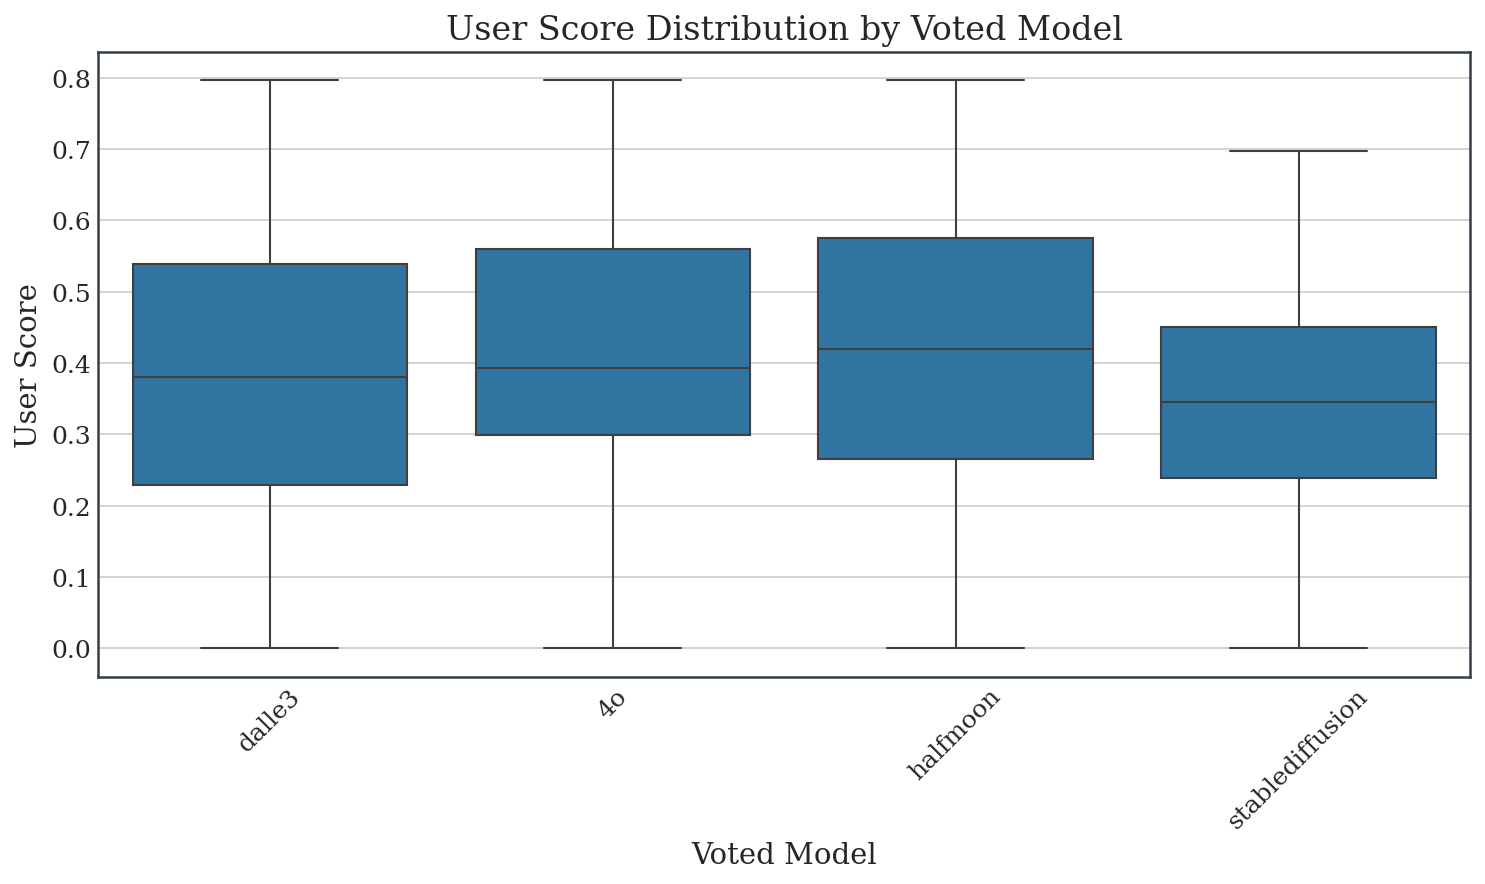

In [132]:
# boxplot of score by voted model

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_exploded, x="voted_for_model", y="userDetails.userScore")
plt.title("User Score Distribution by Voted Model")
plt.xlabel("Voted Model")
plt.ylabel("User Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [133]:
# number of different countries
df_exploded["userDetails.country"].nunique()

36

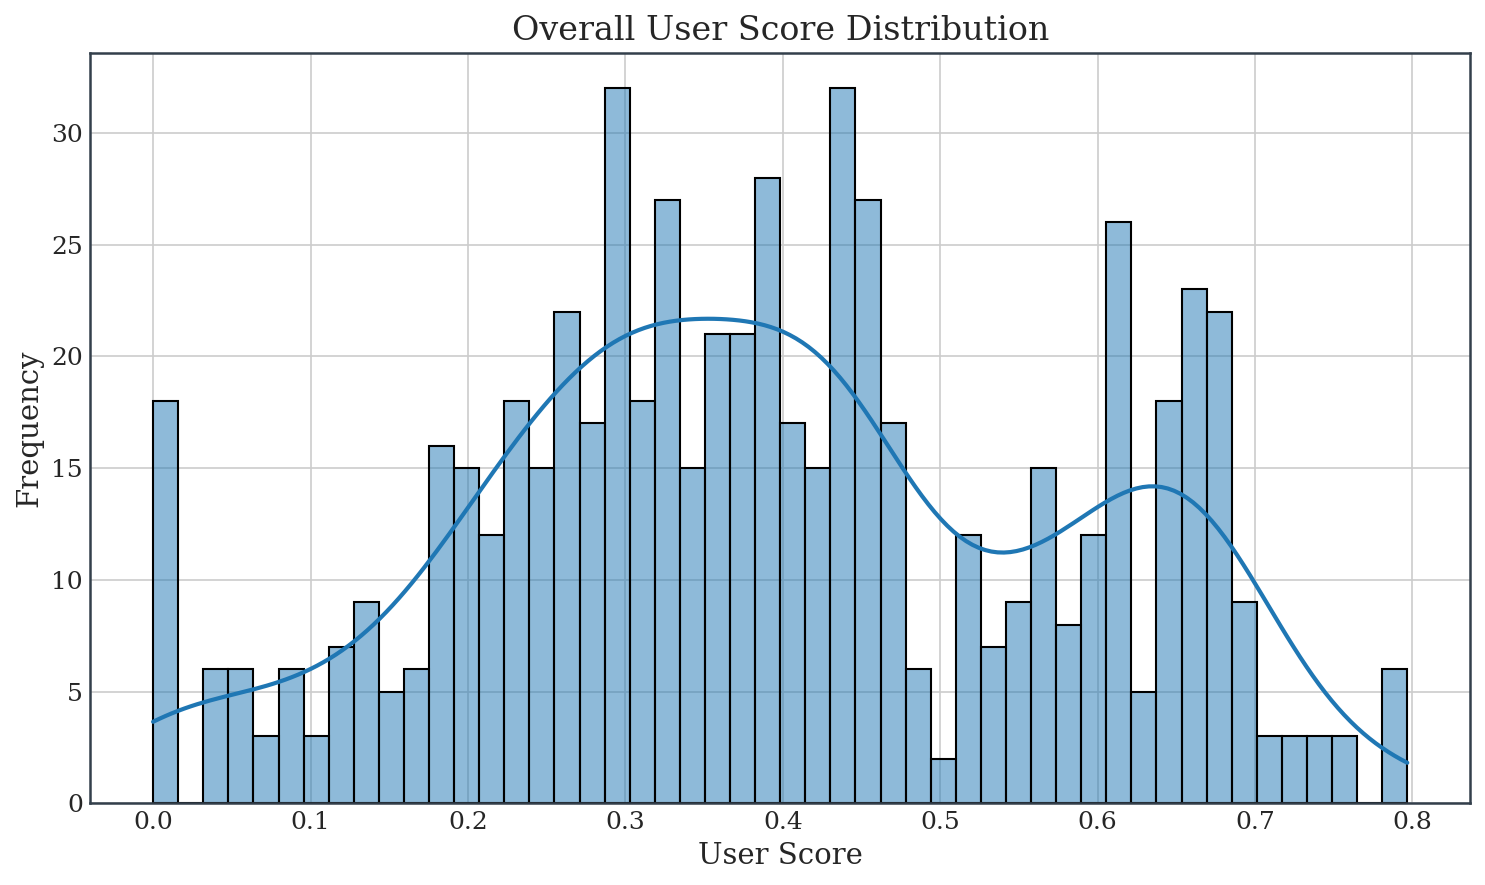

In [134]:
# histogram overall score distribution

plt.figure(figsize=(10, 6))
sns.histplot(df_exploded["userDetails.userScore"], bins=50, kde=True)
plt.title("Overall User Score Distribution")
plt.xlabel("User Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [135]:
# count of different countries

country_counts = df_exploded["userDetails.country"].value_counts()
country_counts

userDetails.country
IN         182
EG          76
RU          58
TR          38
DZ          36
RS          34
DE          29
PH          21
LY          18
IT          18
BR          12
FR          10
ES           9
TZ           9
AU           8
ID           8
UA           6
PK           6
MZ           6
KE           6
VN           6
BD           6
BO           6
MY           6
PY           3
PL           3
AZ           3
unknown      3
KZ           3
MA           3
CD           3
AT           3
AO           3
BF           2
TN           2
ET           1
Name: count, dtype: int64

In [136]:
# age group counts

age_group_counts = df_exploded["userDetails.age"].value_counts()

age_group_counts

userDetails.age
Unknown    233
18-29      104
50-64       78
30-39       77
0-17        74
40-49       45
65+         35
Name: count, dtype: int64

In [137]:
# model preference by age group
age_group_preferences = (
    df_exploded
    .groupby(['userDetails.age', 'winner_model'])  # both grouping keys here
    .size()
    .reset_index(name='count')
)

age_group_preferences['percentage'] = (
    age_group_preferences['count'] / age_group_preferences.groupby(['userDetails.age'])['count'].transform('sum')
)

age_group_preferences

,userDetails.age,winner_model,count,percentage
0,0-17,4o,21,0.283784
1,0-17,dalle3,18,0.243243
2,0-17,halfmoon,21,0.283784
3,0-17,stablediffusion,14,0.189189
4,18-29,4o,25,0.240385
5,18-29,dalle3,30,0.288462
6,18-29,halfmoon,30,0.288462
7,18-29,stablediffusion,19,0.182692
8,30-39,4o,26,0.337662
9,30-39,dalle3,21,0.272727


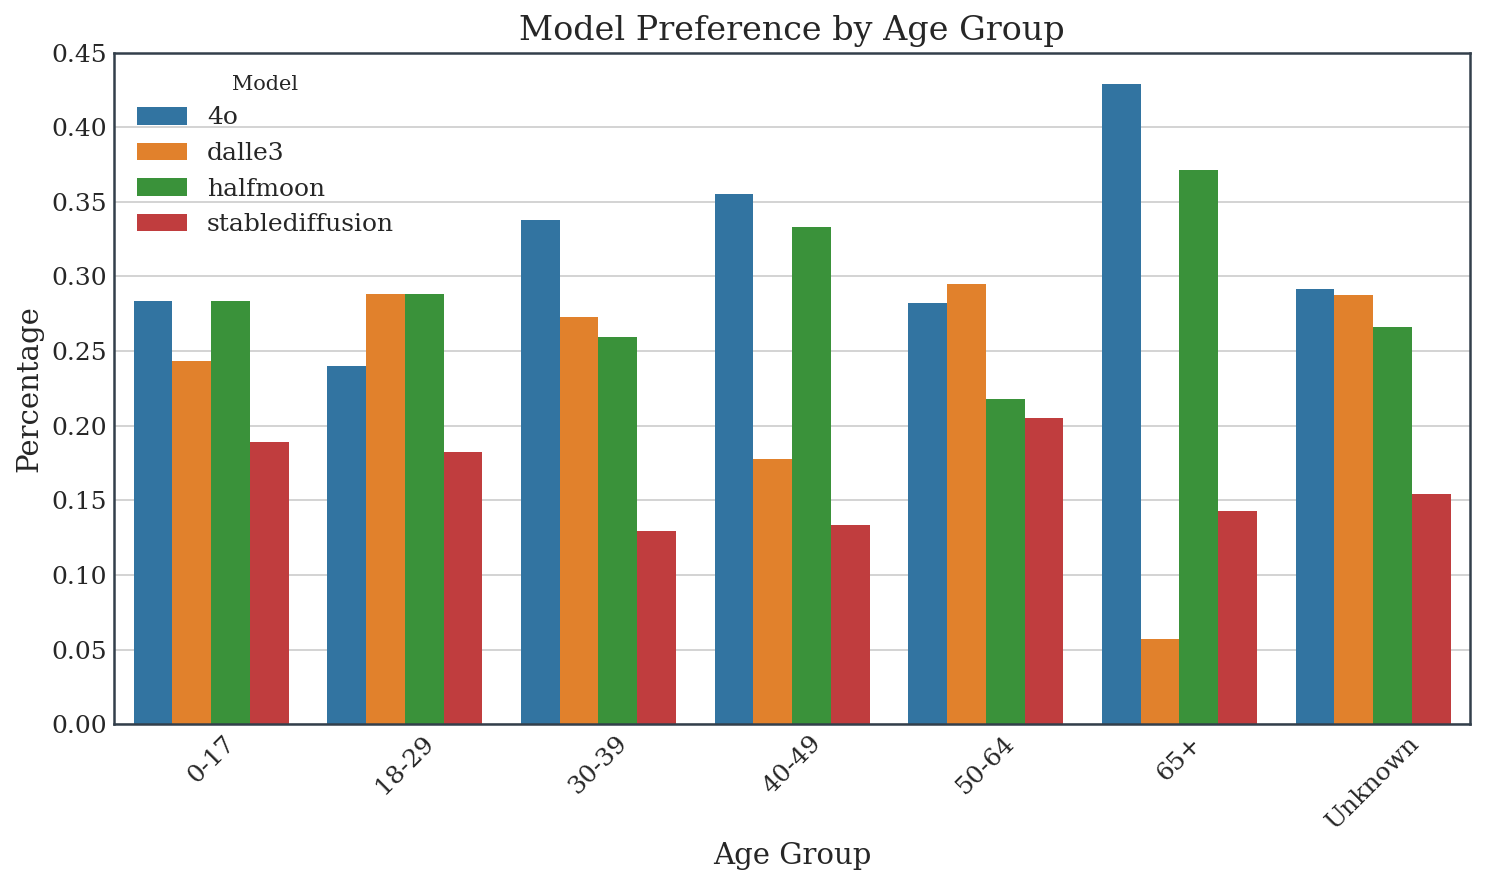

In [138]:
# plot of age preferences by age group

plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_preferences, x="userDetails.age", y="percentage", hue="winner_model")
plt.title("Model Preference by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.legend(title="Model")
plt.tight_layout()

In [139]:
# clustering of users
# using Gower distance

user_information_subset = df_exploded[["userDetails.country", "userDetails.language", "userDetails.userScore", "userDetails.age", "userDetails.gender", "userDetails.occupation"]]

In [140]:
gower_dist = gower.gower_matrix(user_information_subset)

In [141]:
model = KMedoids(n_clusters=4, metric="precomputed").fit(gower_dist)

/home/alex/.local/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


In [142]:
# in each cluster, what is the model preference?
clustered_df = pd.DataFrame(gower_dist, columns=user_information_subset.index, index=user_information_subset.index)
clustered_df["cluster"] = model.labels_
clustered_df["voted_for_model"] = df_exploded["voted_for_model"].values

In [143]:
clustered_df.groupby(["cluster", "voted_for_model"]).size().reset_index(name='count')

,cluster,voted_for_model,count
0,0,4o,51
1,0,dalle3,36
2,0,halfmoon,37
3,0,stablediffusion,29
4,1,4o,47
5,1,dalle3,37
6,1,halfmoon,41
7,1,stablediffusion,21
8,2,4o,32
9,2,dalle3,26


Overall across the clusters there doesn't seem to be a very clear model preference, with only 4o having a slight edge over the other models.

## Bradley-Terry Model

Some final thoughts and suggestions:

- 